In [15]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(os.path.join('data','voice.csv'))
df

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female


In [64]:
list(df.columns)

['meanfreq',
 'sd',
 'median',
 'Q25',
 'Q75',
 'IQR',
 'skew',
 'kurt',
 'sp.ent',
 'sfm',
 'mode',
 'centroid',
 'meanfun',
 'minfun',
 'maxfun',
 'meandom',
 'mindom',
 'maxdom',
 'dfrange',
 'modindx',
 'label']

## Evaluation

The raw dataset contains 3168 entries each with 21 features. A voice sample was recorded for each entry and statistical measures were performed on it and tabulated. (eg. mean frequency, standard deviation of frequency, etc..)

Intuitively, we would expect that <b>meanfreq</b> to be the most contributing factor to the discrimination between male and female, because males have a lower frequency then females.

Notable features:
<ul>
    <li><b>IQR</b> - The interquartile range, Q25 and Q75, are calculated on the frequencies sampled from the voice recording.</li>
    <li><b>sp.ent</b> - Spectral Entropy. The sepctral power distribution along with forecastability of time. Spectral Power is the amplitude of the different frequency components (pure sine waves) that make up the entire signal.</li>
    <li><b>Fundamental Frequency</b> - <a href="https://en.wikipedia.org/wiki/Fundamental_frequency">The lowest frequency of a sinusodial waveform making up our sound.</a> This term encapsulates the variables <b>meanfun, minfun, and  maxfun</b></li>
    <li><b>Dominant Frequency</b> - The frequency that is the most heard, and is always a multiple of the fundamental frequency. The dominant frequency may be equal to the fundamental frequency. This term encapsulates the variables <b>meandom, mindom, maxdom, dfrange</b></li>
    <li><b>modindx</b> - Modulation Index. <a href="https://en.wikipedia.org/wiki/Frequency_modulation#Modulation_index">Defined as the ratio of the peak frequency deviation of the carrier wave to the frequency of the modulating sine wave.</a> We will futher explore how this variable changes between men and women. </li>
</ul>

All frequencies are in kHz!

### Let's compare how the features change between men and women.

<b>Whose voice has the lowest frequency?</b>

As we can see below, males have a lower voice than females. However, except for the edge cases, we can't reliably predict, if a voice is male or female from the frequency alone, as the clusters are relatively close together.

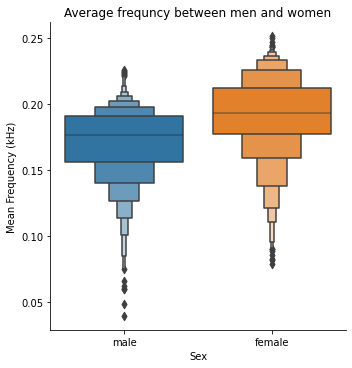

In [19]:
sns.catplot(data=df,
            x='label', y='meanfreq',
            kind="boxen")

plt.title('Frequncy between men and women')
plt.xlabel('Sex')
plt.ylabel('Mean Frequency (kHz)')

plt.show()

<b>Whose frequencies are more spread out during the voice recording?</b>

As we can see below, females tend to have a more constrained vocal range when speaking, as opposed to males. We could also deduce this from the above graph, as the catplot is more stretched out.

Males tend to have the SD of their frequencies be in the range 0.06-0.08. However females have a larger range*, tending to be in the range 0.04-0.08. Approximately, no male has a SD less than 0.04 or more then 0.1. Hence any voice outside these ranges must be of a woman.

<i>*Range meaning that some females have a constrained vocal range, while others have a broader vocal range, as opposed to males, which the vast majority of all have more or less the same vocal range.</i>

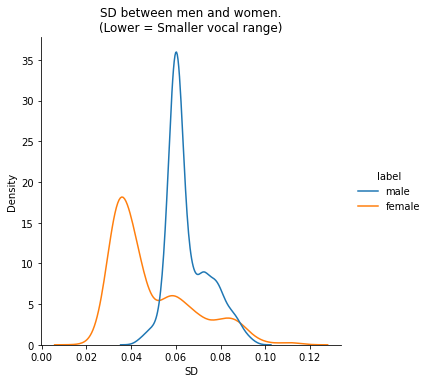

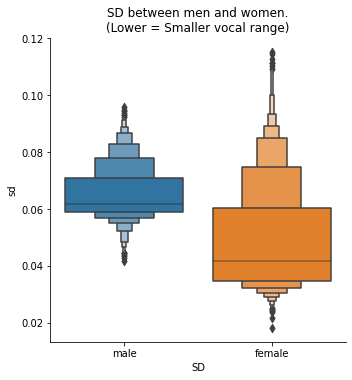

In [60]:
sns.displot(data=df,
            x='sd',hue='label',
            kind='kde')

plt.title('SD between men and women.\n(Lower = Smaller vocal range)')
plt.xlabel('SD')
plt.show()

sns.catplot(data=df,
            y='sd',
            x='label',
           kind='boxen')
plt.title('SD between men and women.\n(Lower = Smaller vocal range)')
plt.xlabel('SD')
plt.show()

<b>Does the fundamental frequency distribution reflect that of the average frequency</b>

As we can see from the below graph, the peak frequency of both sexes tend to be higher than the average frequencies. However there is a lot of overlap between men and women and it might be hard to distinguish gender from this feature

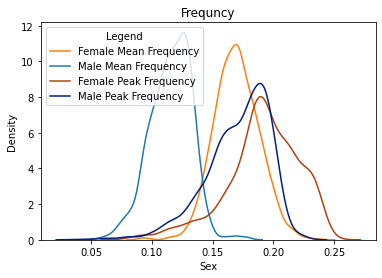

In [149]:
fig, ax = plt.subplots(1,1)
sns.kdeplot(data=df,
            x='meanfun', hue='label',
            ax=ax)

plt.title('Frequncy')
plt.xlabel('Sex')


sns.kdeplot(data=df,
            x='meanfreq', hue='label',
            ax=ax, palette = 'dark')

plt.legend(title='Legend', loc='upper left',
           labels=['Female Mean Frequency', 'Male Mean Frequency',
                   'Female Peak Frequency', 'Male Peak Frequency'])


plt.show()

In [90]:
sns.color_palette("dark")

[(0.0, 0.10980392156862745, 0.4980392156862745),
 (0.6941176470588235, 0.25098039215686274, 0.050980392156862744),
 (0.07058823529411765, 0.44313725490196076, 0.10980392156862745),
 (0.5490196078431373, 0.03137254901960784, 0.0),
 (0.34901960784313724, 0.11764705882352941, 0.44313725490196076),
 (0.34901960784313724, 0.1843137254901961, 0.050980392156862744),
 (0.6352941176470588, 0.20784313725490197, 0.5098039215686274),
 (0.23529411764705882, 0.23529411764705882, 0.23529411764705882),
 (0.7215686274509804, 0.5215686274509804, 0.0392156862745098),
 (0.0, 0.38823529411764707, 0.4549019607843137)]